<a href="https://colab.research.google.com/github/mario89torres/NOVIEMBRE20/blob/master/K_means_MarioTorres_UAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')



In [376]:
from google.colab import files
uploaded = files.upload()

Saving uam2.csv to uam2 (4).csv


     X    Y   Z
id             
1    2   62   3
2   80   25  14
3   36   88   1
4   57   23  14
5   33   17  19
6   76   43   2
7   77   85  14
8   94    6   6
9   89   11   7
10  59   72   6
11  39   82  10
12  87   24  18
13  44   76   3
14   2   83   6
15  19   43  20
16   5   27   4
17  58   72  14
18  14   50  11
19  43   18  19
20  87    7  15
21  11   56  15
22  31   16   4
23  51   94  13
24  55   13  13
25  84   57   5
26  12    2  16
27  53   33   3
28  53   10   7
29  33   32  14
30  69   67  17
31  43    5   3
32  10   75   3
33   8   26  12
34   3    1  14
35  96   22  20
36   6   48  13
37  59   22  10
38  66   69   9
39  22   50   6
40  75   21  18
41   4   81   7
42  41   97  20
43  92   34   9
44  12   64   1
45  60   84   8
46  35  100   5
47  38    2   1
48   9    9   7
49  54   59   9
50   1   58   2


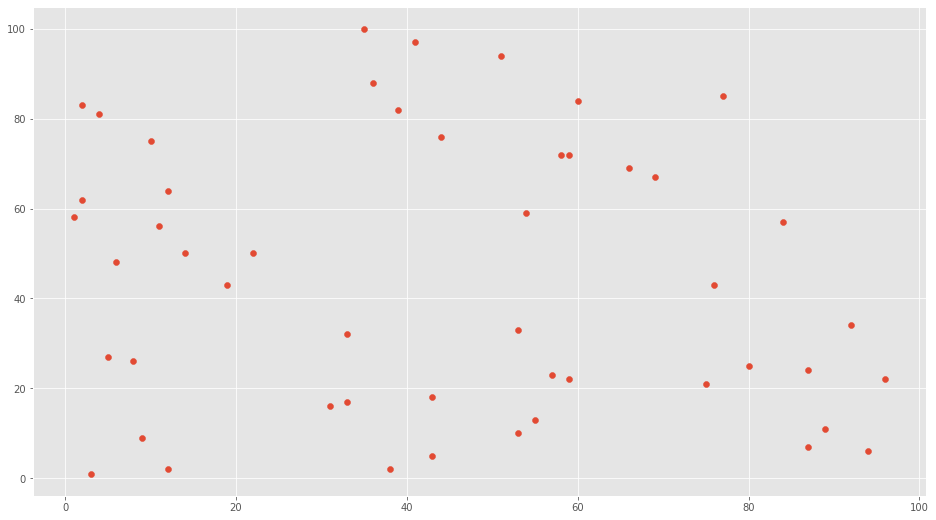

In [429]:
data = pd.read_csv("uam2.csv", index_col="id")
print(data)
coords = data[['X','Y']]
coordsCLientes = data[['X','Y','Z']]
a=data['X']
b=data['Y']
plt.scatter(a,b)



In [430]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(coords)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[53.         80.38461538]
 [45.27272727 17.36363636]
 [ 9.36363636 60.90909091]
 [86.         25.        ]
 [ 7.4        13.        ]]


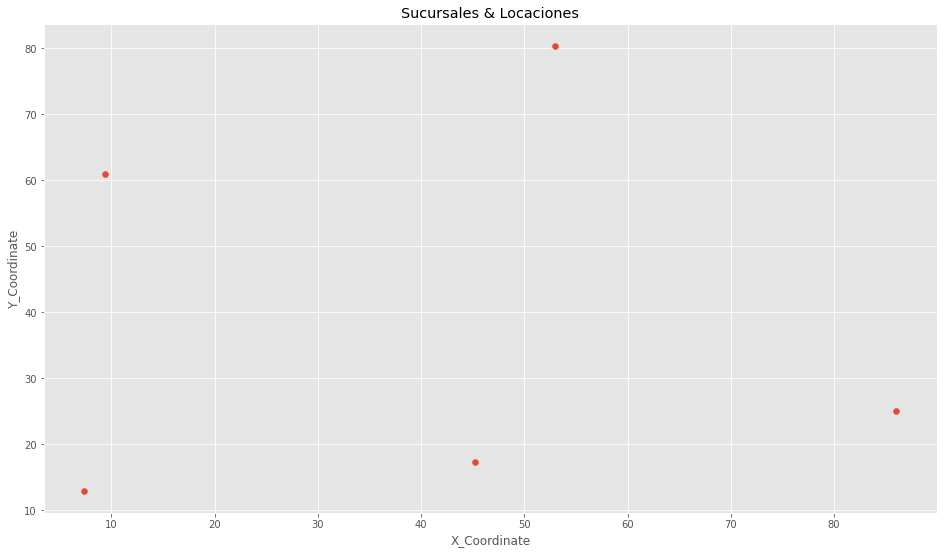

In [431]:
j=np.array(kmeans.cluster_centers_)
print(j)
plt.title("Sucursales & Locaciones")
plt.xlabel("X_Coordinate")
plt.ylabel("Y_Coordinate")

plt.scatter(j[:,0], j[:,1])

In [437]:
kmeans.labels_
print(kmeans.labels_)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
unique
dict_data = dict(zip(unique, counts))
dict_data
coords["Sucursal"] = kmeans.labels_
coordsCLientes["Sucursal"] = kmeans.labels_

[2 3 0 1 1 3 0 3 3 0 0 3 0 2 2 4 0 2 1 3 2 1 0 1 3 4 1 1 1 0 1 2 4 4 3 2 1
 0 2 3 2 0 3 2 0 0 1 4 0 2]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


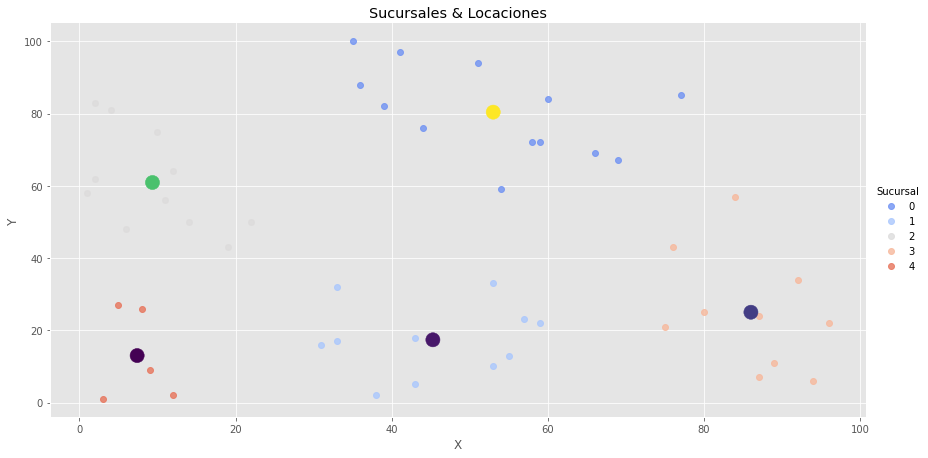

In [438]:
marker_size=200


sns.lmplot('X', 'Y', data=coords, hue='Sucursal', palette='coolwarm', size=6, aspect=2, fit_reg=False,) 
plt.title("Sucursales & Locaciones")
plt.scatter(j[:,0], j[:,1],marker_size,c=j[:,1])


In [395]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

11966.45874125874

In [396]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [439]:
coordsCLientes

,X,Y,Z,Sucursal
id,,,,
1,2,62,3,2
2,80,25,14,3
3,36,88,1,0
4,57,23,14,1
5,33,17,19,1
6,76,43,2,3
7,77,85,14,0
8,94,6,6,3
9,89,11,7,3


In [440]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(coords[["X","Y","Sucursal"]])
y = np.array(coords['Sucursal'])
X.shape

(50, 3)

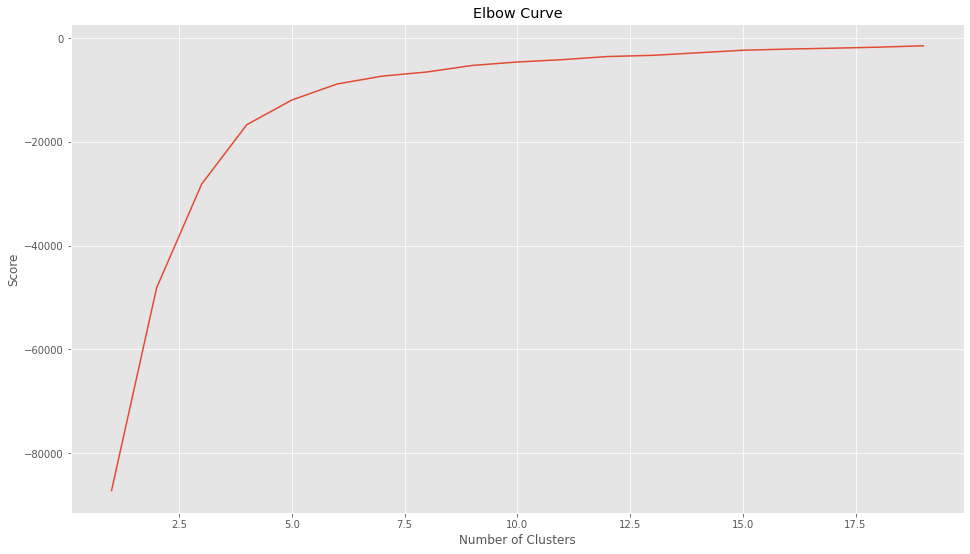

In [371]:

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(coords).score(coords) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

[[53.         80.38461538]
 [45.27272727 17.36363636]
 [ 9.36363636 60.90909091]
 [86.         25.        ]
 [ 7.4        13.        ]]


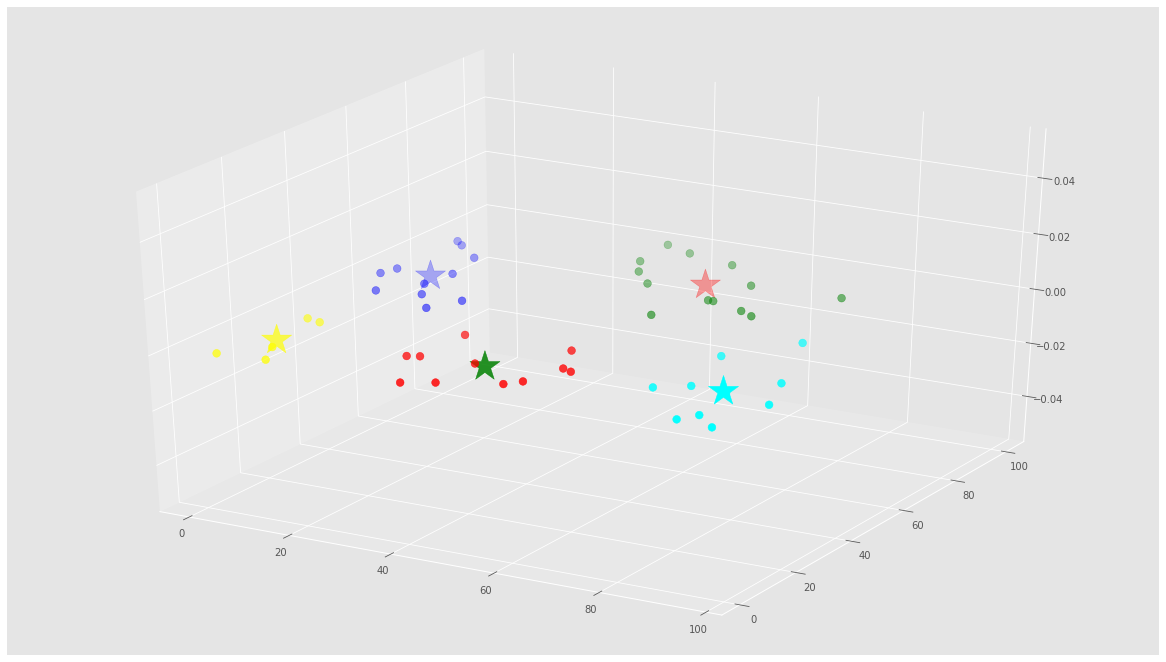

In [441]:

# Prediciendo los  clusters
# Prediciendo los centroides 
C = kmeans.cluster_centers_
print(C)

colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1],  c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1],  marker='*', c=colores, s=1000)

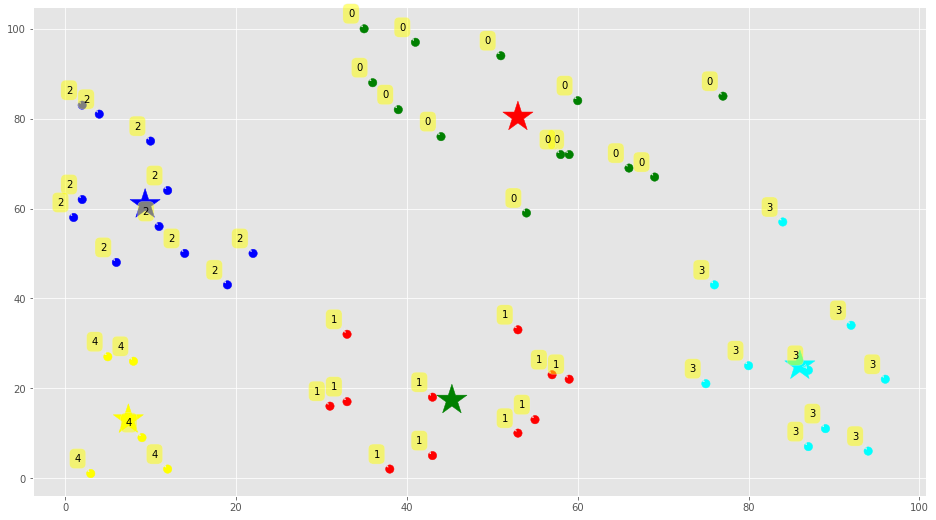

In [445]:
f1 = coords['X'].values
f2 = coords['Y'].values


for label, x, y in zip(coords['Sucursal'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [494]:
copy =  pd.DataFrame()

copy['Sucursal']='Sucursal';

cantidadGrupo =  pd.DataFrame()

cantidadGrupo['Cantiddad']=copy.groupby('Sucursal').size()
print(cantidadGrupo)


Empty DataFrame
Columns: [Cantiddad]
Index: []


In [497]:
group_referrer_index = copy['Sucursal'] ==1
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['Sucursales']=[0,1,2,3,4]
diversidadGrupo['cantidad']=group_referrals.groupby('Sucursal').size()
diversidadGrupo

,Z,cantidad
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [496]:

X_new =np.array([[12,64]])
new_labels = kmeans.predict(X_new)
print(new_labels)

[2]
